Importando os dados da URI

In [49]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Renomeando as colunas do dataset para português

In [50]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Perceba que a coluna da classe do dataset, que é a coluna 'nao_finalizado' ela está um pouco estranha. Uma vez que é familiar para nós trabalhar com 0 para não e 1 para sim, nesse caso o 0 representa que o projeto foi finalizado e o 1 que o projeto não foi finalizado. É interessante inverter isso para evitarmos erros no futuro e vamos fazer isso agora!

In [51]:
# Swap para trocar o zero pelo um
troca = {
    0 : 1,
    1 : 0
}

# Essa inversão será atribuida a uma nova coluna no conjunto de dados
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


Perceba a inversão dos valores na coluna nao_finalizado e a coluna finalizado 

In [52]:
# Analisando os últimos elmentos para avaliar se a inversão foi bem sucedida
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


Nesse conjunto de dados a dimensão dele é bidimensional, uma vez que temos duas features (horas_esperadas e preco), com isso é possível plotar gráficos para visualização dos dados.

## Visualização

Importação da biblioteca para plots

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

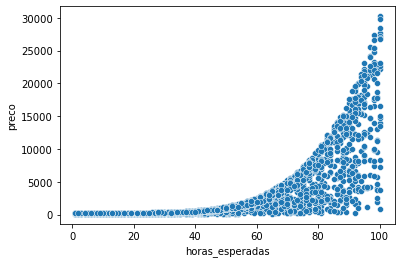

In [53]:
import seaborn as sns

# scatterplot é plotar os pontos de maneira espalhada
sns.scatterplot(x = 'horas_esperadas', y= 'preco', data=dados)

Vamos tentar visualizar os projetos que foram finalizados ou não, no nosso gráfico

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

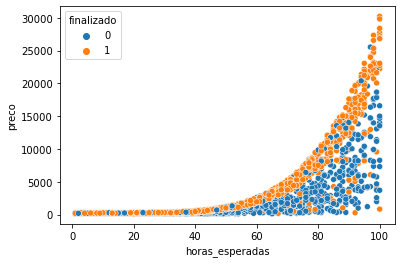

In [54]:
# O atributo hue colori o gráfico baseado no que é passado como parâmetro, aqui o que queremos é colorir baseado se foi
#ou não finalizado
sns.scatterplot(x = 'horas_esperadas', y= 'preco', hue='finalizado', data=dados)

Abaixo é plotado um gráfico diferente mas que passa a mesma informação que o scatterplot, contudo ele divide os dados finalizados e não finalizados em dois gráficos.

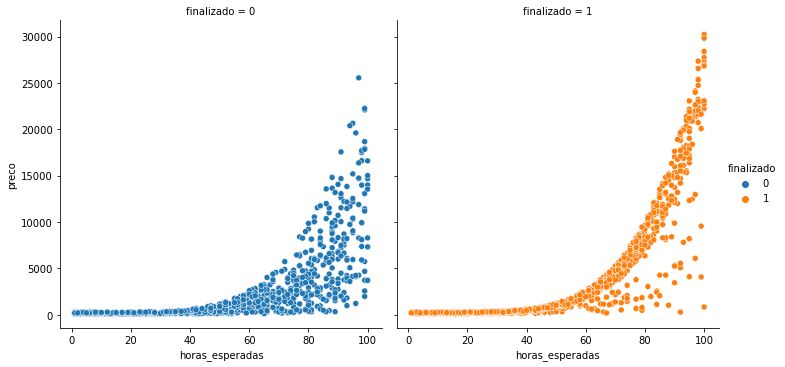

In [55]:
sns.relplot(x = 'horas_esperadas', y= 'preco', hue='finalizado', col='finalizado', data=dados)

Separando o dado em si da classe

In [56]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

Treinamento

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 3

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia )

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 62.78%


C:\Users\Lucas Bernardo\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Obtvemos uma acuracia relativamente baixa, vamos analisar isso com um caso em que chutaremos que todos os projetos foram finalizados e ver a acurácia dessa previsão. Utilizando um algoritmo de base

In [58]:
import numpy as np

# Criando um array de uns
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia )

A acurácia do algoritmo de baseline foi 52.59%


O algoritmo base é implementado inserindo um número absoluto (0 ou 1) em uma das colunas de treino.

## Análise das classificações

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

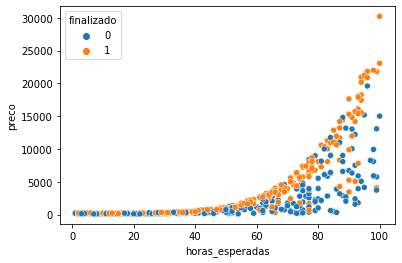

In [59]:
sns.scatterplot(x = 'horas_esperadas', y= 'preco', hue=teste_y, data=teste_x)

É perceptível que o treinamento e o meu teste não estão visualmente diferentes, o que está dando errado? O algoritmo tem que perceber essa curva que os meus dados formam e aprender com ela. Qual é a curva de decisão do algoritmo?

O que será feito nas celulas abaixo é pegar todos os pontos do gráfico que foi plotado acima que é teste_x por teste_y e passar para o modelo para prever se ali naquele ponto o projeto foi finalizado ou não e pintar esse ponto e assim visualizar a curva do nosso modelo.

1° Pegamos os pontos minimos do x e do y e os seus respectivos pontos máximos

In [60]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


Dividir o espaço entre x_mim e x_max em 100 partes e é somado proporcionalmente em 0,99.

In [61]:
# Estabelecendo a quantidade de pixels, 100 x 100 vai dar 10000 pontos
pixels = 100
# Cada pixel vai representar um tamanho de 0.99 até chegar no 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

Agora é criado um grid, pegar o eixo x e o eixo y e multiplicar eles

In [62]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
# Mesclando o eixo x com o y
pontos = np.c_[xx.ravel(), yy.ravel()] # c_ é uma operação de concatenação
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

Agora sim vamos usando o modelo prever para todos esses pontos

In [63]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

Agora usando o matplotlib podemos plotar o gráfico e visualizar a curva do nosso modelo

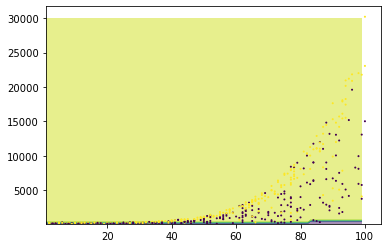

In [65]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

A curva do modelo está localizada na parte inferior bem pequena, basicamente tudo o que esta acima da curva foi chutado numa coisa só, o modelo chutou que vai finalizar a grande maioria dos projetos. É perceptível que o modelo não segue a curva natural existente nos dados. Note a <b>Decision Boundary</b>

Temos esse resultado pois esse modelo só é capaz de aprender relacionamentos entre variáveis que se dão por meio de retas. Então para resolver esse problema de classificação de maneira mais acurada, precisamos de um algoritmo que não aprenda somente com relacionamentos lineares.